# Mean Shift
중심을 데이터 밀도가 가장 높은 곳으로 이동

수행 과정
Mean Shift 알고리즘으로 데이터 분포도 계산 -> 데이터 분포도 높은 방향으로 데이터 이동 ->
KDE 기반 군집화 수행 -> iteration을 통해 지속 수행 -> 군집 중심점 설정

KDE? 커널 함수를 통해 변수의 확률 밀도 함수(PDF)를 추정하는 방법
개별 관측 데이터에 커널 함수 적용 -> 적용 값 더한 후 건수로 나누어 PDF 추정 (가우시안 분포 함수 사용)

사이킷런은 MeanShift 클래스 제공

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels type:", np.unique(cluster_labels))

cluster labels type: [0 1 2 3 4 5]


In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels type:", np.unique(cluster_labels))

cluster labels type: [0 1 2]


estimate_bandwidth() 함수를 통해 최적화된 bandwidth 값 탐색

In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth:", round(bandwidth, 3))

bandwidth: 1.816


In [5]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=["ftr1", "ftr2"])
clusterDF["target"] = y

best_bandwidth = estimate_bandwidth(X)
print("best_bandwidth:", best_bandwidth)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels type:", np.unique(cluster_labels))

best_bandwidth: 1.8158484154517098
cluster labels type: [0 1 2]


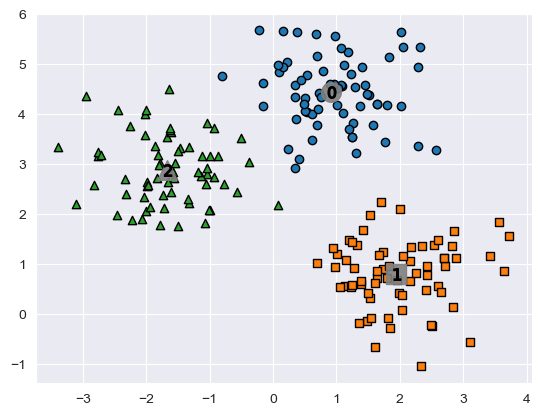

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF["meanshift_label"] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF["meanshift_label"] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster["ftr1"], y=label_cluster["ftr2"], edgecolors='k',
                marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color="gray", alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker="$%d$" % label)

plt.show()

In [7]:
# target 과 군집 label 값 비교
print(clusterDF.groupby("target")["meanshift_label"].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
